# Sensitivity to roughness lengths
* Last updated 10/9/23
* Timothy Juliano (NCAR/RAL) and Andrew Ackerman and Ann Fridlind (NASA/GISS)
* Special thanks to Dmitry Chechin (Obukhov Institute of Atmospheric Physics) for motivating this work

## Hypothesis
* Momentum (z0) and scalar [temperature and moisture (z0t and z0q)] roughness length formulations impact CAO cloud evolution through surface momentum and heat fluxes because these events are strongly surface-forced

## Approach
* Test 3 sets of formulations and derive reasonable set for COMBLE-MIP
* Many formulations exist for z0, z0t, and z0q; here, we explore just a few of the more well-known formulations
1. Momentum roughness length (z0): \
-> Functional form and a2 from Charnock (1955, QJRMS) and Smith (1988, JGR) \
-> a1 from COARE 3.5/Edson et al. (2013 JPO) (eq. 13, assuming 10 m wind speed = 12 m/s)

![Momentum Roughness Length](../../figures/z0m_eq.png)

where a1 = 0.0154, a2 = 0.11, u* is friction velocity, g is acceleration due to gravity, and ν is kinematic viscosity

2. Scalar roughness lengths (z0t and z0q): \
-> Functional form from Fairall et al. (2003, JC) (eq. 28) \
-> Equation is valid for both z0t and z0q

![Scalar Roughness Length](../../figures/z0t_q_eq.png)

where Rr is the roughness Reynolds number, Rr = z0 x u* / ν

## Sensitivities
1. *z0_1*: Compute z0, z0t, and z0q according to above equations/constants
2. *z0_2*: Compute z0 according to above equations/constants and set z0t = z0q = 0.1*z0
3. *z0_3*: Set z0, z0t, and z0q according to CONSTRAIN intercomparison case (z0 = 6.6 x 10^-4 m; z0t = z0q = 3.7 x 10^-6 m)
4. *z0_4*: Compute constant z0, z0t, and z0q values from *z0_1* for COMBLE-MIP case (z0 = 9.0 x 10^-4 m; z0t = z0q = 5.5 x 10^-6 m) \
--> Note: DHARMA LES used z0t = z0q = 5.0 x 10^-6 m for *z0_4*

In [1]:
%run functions_plotting.py

In [6]:
## select simulations to plot
sim_keyword = 'dx200_z0_'

## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../../data_files/')

## load radiosondes
rs_dat = load_rs(t_filter = 6.)

## load DOE ARM site statistics
aeri_dat = load_aeri(t_filter = 0.5)

## load MAC-LWP
maclwp_dat = load_maclwp(t_filter = 0.) 

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(t_filter = 3.)

../../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../../data_files/anxsondewnpnM1.b1.20200313.052700.cdf
../../data_files/anxsondewnpnM1.b1.20200313.112600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.232200.cdf


In [12]:
## define (thermo-)dynamical variables that we want to plot
## 1-d variables (time)
var_vec_1d = ['hfss','hfls','ustar','z0','z0t','z0q']
## hfss ---> sfc sensible heat flux (W/m2)
## hfls ---> sfc latent heat flux (W/m2)
## ustar --> sfc friction velocity (m/s)
## z0 -----> momentum roughness length (m)
## z0t ----> temperature roughness length (m)
## z0q ----> moisture roughness length (m)

## 2-d variables (time,height)
var_vec_2d = ['theta','qv','ua','va']
## theta --> potential temperature (K)
## qv -----> water vapor mixing ratio (kg/kg)
## ua -----> zonal wind speed (m/s)
## va -----> meridional wind speed (m/s)


var_vec_1d = ['hfss','hfls','ts','lwpr','lwpc','iwp','od']
var_vec_2d = ['theta','qv','qlc','qlr','qic','qis','qig','ua','va','ta','prf']

In [13]:
## load select variables from all simulations located in subfolders of the given directory
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,diag_zi_ctt=True)

Loading variables: f(time)
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_1.nc
lwpr not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_1.nc
lwpc not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_1.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_2.nc
lwpr not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_2.nc
lwpc not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_2.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_3.nc
lwpr not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_3.nc
lwpc not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_3.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_4.nc
lwpr not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_4.nc
lwpc not found in ../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_4.nc
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_1.nc
lwpr not found in ../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_1.nc
lwpc not fo

In [16]:

plot_colors = ["#56B4E9",'r','gray','magenta',"#56B4E9",'r','gray','magenta']
plot_ls = ['-','-','-','-','-','--','--','--','--']
plot_1d(pd.concat([df_col_1d,era5_1d]),['hfss','hfls','cth','ctt'],t0=-1.,t1=18.,plot_colors=plot_colors,plot_ls=plot_ls,longnames=['Surface Sensible Heat Flux','Surface Latent Heat Flux', 'Cloud-Top Height','Cloud-Top Temperature'],units=['W m^-2','W m^-2','m','°C'],savepng=True)

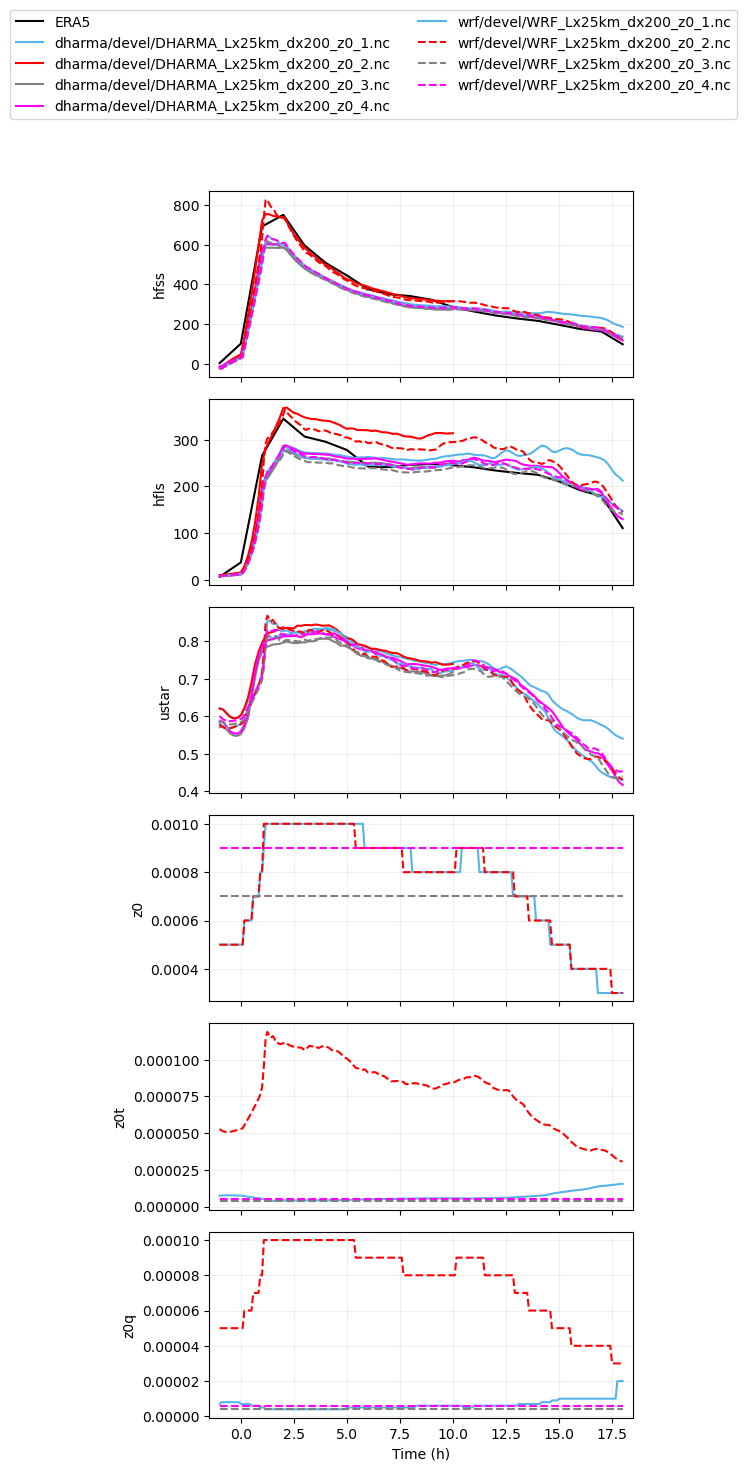

In [10]:
## plot the 1-d variables
plot_colors = ["#56B4E9",'r','gray','magenta',"#56B4E9",'r','gray','magenta']
plot_ls = ['-','-','-','-','-','--','--','--','--']
plot_1d(pd.concat([df_col_1d,era5_1d]),var_vec_1d,t0=-1.,t1=18.,plot_colors=plot_colors,plot_ls=plot_ls)

In [107]:
## print mean values for each time series from WRF
print ('Simulation                        | z0                 | z0t                 | z0q')
for label, df in df_col_1d.groupby('class'):
    if 'WRF' in label:
        print (label, df['z0'].mean(), df['z0t'].mean(), df['z0q'].mean())

Simulation                        | z0                 | z0t                 | z0q
wrf/devel/WRF_Lx25km_dx200_z0_1.nc 0.000767167861310251 7.1566981546311584e-06 7.1566981546311584e-06
wrf/devel/WRF_Lx25km_dx200_z0_2.nc 0.0007651540625071599 7.65069527309e-05 7.65069527309e-05
wrf/devel/WRF_Lx25km_dx200_z0_3.nc 0.0006600000197067857 3.6999999792897142e-06 3.6999999792897142e-06
wrf/devel/WRF_Lx25km_dx200_z0_4.nc 0.0008999999845400453 5.500000042957254e-06 5.500000042957254e-06


Computing wind speed
Computing wind direction


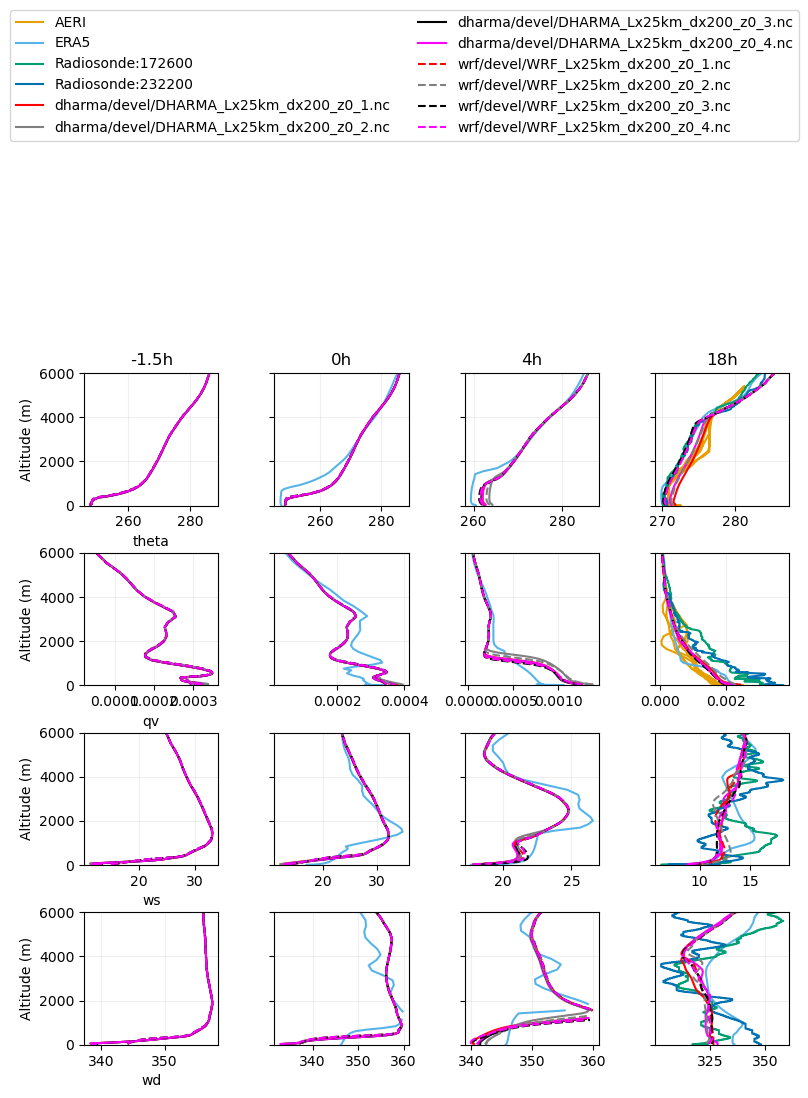

<Figure size 1000x600 with 0 Axes>

In [108]:
## plot the 1-d variables, plus ERA5 and radiosondes at Andenes
plot_colors = ["#E69F00", "#56B4E9", "#009E73","#0072B2",'r','gray','k','magenta','r','gray','k','magenta']
plot_ls = ['-','-','-','-','-','-','-','-','--','--','--','--']
plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),['theta','qv','ws','wd'],times=[-1.5,0,4,18],z_max=6000,plot_colors=plot_colors,plot_ls=plot_ls)

In [109]:
## define cloud variables that we want to plot
var_vec_1d = ['lwp','iwp'] # variables without ERA5 (shorter time axis)

## load select variables from all simulations located in subfolders of the given directory
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

Loading variables: f(time)
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_2.nc
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_3.nc
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_1.nc
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_4.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_2.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_3.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_1.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_4.nc
Loading variables: f(time,height)
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_2.nc
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_3.nc
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_1.nc
../../output_les/wrf/devel/WRF_Lx25km_dx200_z0_4.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_2.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_3.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_1.nc
../../output_les/dharma/devel/DHARMA_Lx25km_dx200_z0_4.nc


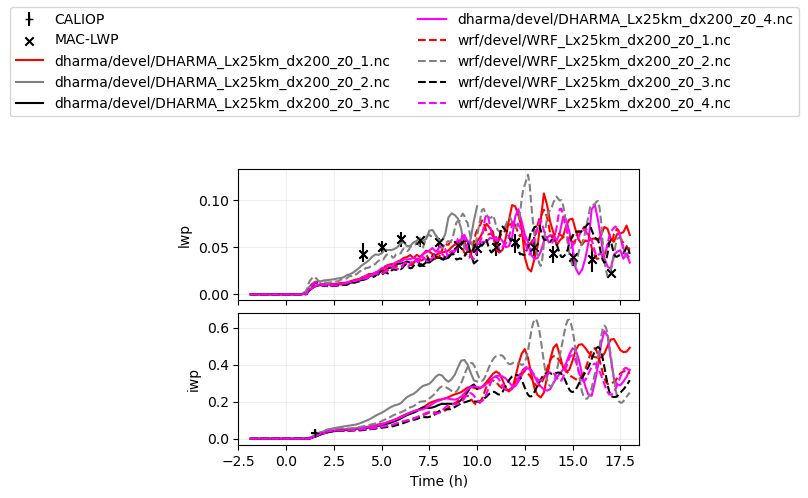

In [110]:
## plot LWP and IWP
plot_colors = ['r','gray','k','magenta','r','gray','k','magenta']
plot_ls = ['-','-','-','-','--','--','--','--']
plot_1d(pd.concat([df_col_1d,maclwp_dat,calipso_dat]),['lwp','iwp'],plot_colors=plot_colors,plot_ls=plot_ls)

## Summary of Results
* Choice of roughness length parameterization can have substantial impact on surface heat fluxes under the convective CAO conditions studied here (up to ~20-30% difference between *z0_2* and the other runs).
* In turn, the enhanced surface heat fluxes in *z0_2* lead to larger domain-averaged LWP and IWP values, with perhaps larger cells (as suggested by the greater fluctuations in values). Although, we are limited by domain size (Lx = Ly = 25.6 km) and cannot confidently say whether this is true.
* The assumption of z0t = z0q = 0.1*z0 may be unreasonable in this case, as *z0_1* suggests much smaller z0t and z0q values. However, lack of observations prevents us from coming to a conclusion on this topic.
* The fixed roughness lengths, which are used in *z0_4*, are reasonable approximations for those derived from *z0_1*, with relatively small differences apparent in the domain-mean (thermo)-dynamical and cloud fields.